In [1]:
import numpy as np
import pandas as pd
from pycaret.regression import *

In [2]:
df = pd.read_csv('description/Morder/SMILES22-SEED1-Mordred-group.csv')


data_fea_corr = df.iloc[:, 2:].corr()
del_fea2_col = []
del_fea2_ind = []
length = data_fea_corr.shape[1]
for i in range(length):
    for j in range(i + 1, length):
        if abs(data_fea_corr.iloc[i, j]) >= 0.95:
            del_fea2_col.append(data_fea_corr.columns[i])
            del_fea2_ind.append(data_fea_corr.index[j])
df.drop(columns=del_fea2_ind, inplace=True)

# 去除方差小于等于 0.05 的特征
data_fea_var = df.iloc[:, 2:].var()
del_fea1 = list(data_fea_var[data_fea_var <= 0.05].index)
df.drop(columns=del_fea1, inplace=True)

In [38]:
df

,ABC,ABCGG,nAcid,SpAbs_A,nAromAtom,nAtom,nHetero,nH,nC,nN,...,MDEC-12,MDEO-11,AMID_h,piPC8,piPC9,bpol,nRot,SLogP,GGI1,label
group,,,,,,,,,,,,,,,,,,,,,
train,0,0,0,4.000,0,12,3,7,2,0,...,0.000,0.000,1.0500,0.000,0.000,16.35,0,0.8780,3.0,301
train,0,0,1,6.721,0,20,2,13,5,0,...,2.449,0.000,0.5377,0.000,0.000,24.47,2,0.6849,3.0,338
train,0,0,0,3.464,0,7,3,3,1,0,...,0.000,0.000,1.2780,0.000,0.000,7.73,0,1.9740,1.5,83
train,0,0,0,11.190,6,15,3,6,6,1,...,0.000,0.000,0.5959,0.000,0.000,11.60,1,-0.0562,2.0,129
train,0,0,0,12.530,6,18,5,7,6,0,...,0.000,1.732,0.8126,0.000,0.000,18.45,1,-1.0470,4.0,498
train,0,0,0,3.464,0,7,4,3,0,0,...,0.000,1.500,1.6830,0.000,0.000,10.93,0,-2.0520,1.5,156
train,0,0,0,12.530,6,19,5,8,6,1,...,0.000,1.500,0.8127,3.446,0.000,18.88,1,-1.1700,3.5,429
train,0,0,0,14.980,6,19,7,6,6,1,...,0.000,2.358,0.9707,0.000,0.000,18.61,2,-0.8442,4.5,499
train,0,0,0,21.170,12,26,8,9,9,6,...,0.000,0.000,0.8959,5.887,6.219,18.03,3,-0.5454,4.5,554


In [4]:

# 假设'group'列的值是'train'或'test'，用来区分训练和测试数据
# 将'group'列设置为索引（如果它不是的话），这样我们可以基于它进行过滤
df.set_index('group', inplace=True)
#df.set_index('label', inplace=True)

# 根据'group'索引来选择训练数据（group为'train'的行）
train = df.loc['train'].reset_index(drop=True)
# 选择测试数据（group为'test'的行）
# 注意：如果'test'组不存在，这将会抛出一个错误
test = df.loc['test'].reset_index(drop=True)
#train = train.loc[:, 'label':].iloc[:, 1:]  # 排除 'c' 列
#test = test.loc[:, 'label':].iloc[:, 1:]  # 排除 'label' 列


In [39]:
train

,ABC,ABCGG,nAcid,SpAbs_A,nAromAtom,nAtom,nHetero,nH,nC,nN,...,MDEC-12,MDEO-11,AMID_h,piPC8,piPC9,bpol,nRot,SLogP,GGI1,label
0,0,0,0,4.000,0,12,3,7,2,0,...,0.000,0.000,1.0500,0.000,0.000,16.35,0,0.8780,3.0,301
1,0,0,1,6.721,0,20,2,13,5,0,...,2.449,0.000,0.5377,0.000,0.000,24.47,2,0.6849,3.0,338
2,0,0,0,3.464,0,7,3,3,1,0,...,0.000,0.000,1.2780,0.000,0.000,7.73,0,1.9740,1.5,83
3,0,0,0,11.190,6,15,3,6,6,1,...,0.000,0.000,0.5959,0.000,0.000,11.60,1,-0.0562,2.0,129
4,0,0,0,12.530,6,18,5,7,6,0,...,0.000,1.732,0.8126,0.000,0.000,18.45,1,-1.0470,4.0,498
5,0,0,0,3.464,0,7,4,3,0,0,...,0.000,1.500,1.6830,0.000,0.000,10.93,0,-2.0520,1.5,156
6,0,0,0,12.530,6,19,5,8,6,1,...,0.000,1.500,0.8127,3.446,0.000,18.88,1,-1.1700,3.5,429
7,0,0,0,14.980,6,19,7,6,6,1,...,0.000,2.358,0.9707,0.000,0.000,18.61,2,-0.8442,4.5,499
8,0,0,0,21.170,12,26,8,9,9,6,...,0.000,0.000,0.8959,5.887,6.219,18.03,3,-0.5454,4.5,554
9,0,0,1,7.385,0,19,3,11,5,0,...,1.500,0.500,0.6796,0.000,0.000,23.33,2,0.0745,4.0,80


In [6]:
cm = setup(data = train, target = 'label', train_size = 0.8, test_data = test, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

rf = create_model('rf')
tunedrf = tune_model(rf, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedrf)
best_params = tunedrf.get_params()

# 输出参数
print("XGBoost 模型使用的参数：")
for param_name, param_value in best_params.items():
    print(f"{param_name}: {param_value}")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,116.8705,16815.0105,129.6727,0.0829,0.6516,0.6840
1,134.6979,27655.2094,166.2986,0.1704,0.8555,1.2308
2,96.2523,12505.1276,111.8263,0.5336,0.6661,0.8320
3,96.0827,14863.7409,121.9169,-1.4281,0.2870,0.1989
4,116.6244,20737.5954,144.0055,0.2399,0.5145,0.5315
Mean,112.1056,18515.3368,134.7440,-0.0803,0.5949,0.6954
Std,14.5712,5307.0440,18.9575,0.6907,0.1884,0.3402


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,155.1255,33040.4388,181.7703,-0.0059,0.7441,0.8302


XGBoost 模型使用的参数：
bootstrap: True
ccp_alpha: 0.0
criterion: mae
max_depth: 4
max_features: 0.464578042681008
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 7.715856467509482e-08
min_impurity_split: None
min_samples_leaf: 2
min_samples_split: 3
min_weight_fraction_leaf: 0.0
n_estimators: 276
n_jobs: -1
oob_score: False
random_state: 2019
verbose: 0
warm_start: False


In [7]:
df_1 = pd.read_csv('description/Morder/SMILES22-SEED2-Mordred-group.csv')

data_fea_corr = df_1.iloc[:, 2:].corr()
del_fea2_col = []
del_fea2_ind = []
length = data_fea_corr.shape[1]
for i in range(length):
    for j in range(i + 1, length):
        if abs(data_fea_corr.iloc[i, j]) >= 0.95:
            del_fea2_col.append(data_fea_corr.columns[i])
            del_fea2_ind.append(data_fea_corr.index[j])
df_1.drop(columns=del_fea2_ind, inplace=True)

# 去除方差小于等于 0.05 的特征
data_fea_var = df_1.iloc[:, 2:].var()
del_fea1 = list(data_fea_var[data_fea_var <= 0.05].index)
df_1.drop(columns=del_fea1, inplace=True)


# 假设'group'列的值是'train'或'test'，用来区分训练和测试数据
# 将'group'列设置为索引（如果它不是的话），这样我们可以基于它进行过滤
df_1.set_index('group', inplace=True)

# 根据'group'索引来选择训练数据（group为'train'的行）
train_1 = df_1.loc['train'].reset_index(drop=True)
# 选择测试数据（group为'test'的行）
# 注意：如果'test'组不存在，这将会抛出一个错误
test_1 = df_1.loc['test'].reset_index(drop=True)
#train_1 = train_1.loc[:, 'smiles':].iloc[:, 1:]  # 排除 'label' 列
#test_1 = test_1.loc[:, 'smiles':].iloc[:, 1:]  # 排除 'label' 列


cm = setup(data = train_1, target = 'label', train_size = 0.8, test_data = test_1, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

rf_1 = create_model('rf')
tunedrf_1 = tune_model(rf_1, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedrf_1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,116.2360,16708.1959,129.2602,-6.1418,0.5054,0.3340
1,147.6039,25331.1411,159.1576,0.3598,0.7666,1.0429
2,129.7526,22535.9440,150.1198,-0.4703,0.8265,1.2227
3,143.7610,26764.8483,163.5997,0.0280,0.5355,0.5667
4,102.8396,10873.5166,104.2762,0.7220,0.5711,0.6546
Mean,128.0386,20442.7292,141.2827,-1.1005,0.6410,0.7642
Std,16.7763,5895.1485,21.9530,2.5510,0.1301,0.3237


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,113.9028,28809.7621,169.7344,-0.0227,0.6470,0.5222


,SpAbs_A,ATS0dv,ATS5dv,ATS6dv,ATS7dv,ATS8dv,ATS0s,ATS3s,ATS4s,ATS5s,...,nHBDon_1,nHBDon_2,nHBDon_3,nHBDon_4,nRot_0,nRot_1,nRot_2,nRot_3,label,Label
0,-0.906361,-1.504322,-0.708551,-0.615291,-0.503627,-0.444841,-1.717065,-1.318632,-1.021318,-0.808961,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,520,200.096046
1,0.330047,0.331208,-0.185872,-0.615291,-0.503627,-0.444841,0.419490,0.547307,1.274308,0.538174,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,429,434.211758
2,-0.326568,-1.364056,-0.708551,-0.615291,-0.503627,-0.444841,-1.492749,-0.950063,-0.336738,-0.141420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,79,190.931881
3,0.222785,0.147899,-0.185872,-0.615291,-0.503627,-0.444841,0.191859,0.316389,0.378649,0.027876,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,418,399.436576


In [36]:
df_1

,ABC,ABCGG,nAcid,SpAbs_A,nAromAtom,nAtom,nHetero,nH,nC,nN,...,MDEC-12,MDEO-11,AMID_h,piPC8,piPC9,bpol,nRot,SLogP,GGI1,label
group,,,,,,,,,,,,,,,,,,,,,
train,0,0,0,12.530,6,19,5,8,6,1,...,0.000,1.500,0.8126,0.000,0.000,18.88,1,-1.1700,4.0,399
train,0,0,0,4.000,0,12,3,7,2,0,...,0.000,0.000,1.0500,0.000,0.000,16.35,0,0.8780,3.0,301
train,0,0,1,6.721,0,20,2,13,5,0,...,2.449,0.000,0.5377,0.000,0.000,24.47,2,0.6849,3.0,338
train,0,0,0,3.464,0,7,3,3,1,0,...,0.000,0.000,1.2780,0.000,0.000,7.73,0,1.9740,1.5,83
train,0,0,0,11.190,6,15,3,6,6,1,...,0.000,0.000,0.5959,0.000,0.000,11.60,1,-0.0562,2.0,129
train,0,0,0,12.530,6,18,5,7,6,0,...,0.000,1.732,0.8126,0.000,0.000,18.45,1,-1.0470,4.0,498
train,0,0,0,3.464,0,7,4,3,0,0,...,0.000,1.500,1.6830,0.000,0.000,10.93,0,-2.0520,1.5,156
train,0,0,0,10.420,6,13,2,5,6,0,...,0.000,0.000,0.4509,0.000,0.000,11.16,1,0.3616,1.0,141
train,0,0,0,14.980,6,19,7,6,6,1,...,0.000,2.358,0.9707,0.000,0.000,18.61,2,-0.8442,4.5,499


In [40]:
df_2 = pd.read_csv('description/Morder/SMILES22-SEED3-Mordred-group.csv')

data_fea_corr = df_2.iloc[:, 2:].corr()
del_fea2_col = []
del_fea2_ind = []
length = data_fea_corr.shape[1]
for i in range(length):
    for j in range(i + 1, length):
        if abs(data_fea_corr.iloc[i, j]) >= 0.95:
            del_fea2_col.append(data_fea_corr.columns[i])
            del_fea2_ind.append(data_fea_corr.index[j])
df_2.drop(columns=del_fea2_ind, inplace=True)

# 去除方差小于等于 0.05 的特征
data_fea_var = df_2.iloc[:, 2:].var()
del_fea1 = list(data_fea_var[data_fea_var <= 0.05].index)
df_2.drop(columns=del_fea1, inplace=True)

# 假设'group'列的值是'train'或'test'，用来区分训练和测试数据
# 将'group'列设置为索引（如果它不是的话），这样我们可以基于它进行过滤
df_2.set_index('group', inplace=True)

# 根据'group'索引来选择训练数据（group为'train'的行）
train_2 = df_2.loc['train'].reset_index(drop=True)
# 选择测试数据（group为'test'的行）
# 注意：如果'test'组不存在，这将会抛出一个错误
test_2 = df_2.loc['test'].reset_index(drop=True)
#train_2 = train_2.loc[:, 'smiles':].iloc[:, 1:]  # 排除 'label' 列
#test_2 = test_2.loc[:, 'smiles':].iloc[:, 1:]  # 排除 'label' 列


cm = setup(data = train_2, target = 'label', train_size = 0.8, test_data = test_2, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

rf_2 = create_model('rf')
tunedrf_2 = tune_model(rf_2, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
#predict_model(tunedrf_2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,69.4376,6167.4022,78.5328,-1.6362,0.2329,0.1825
1,172.3501,36470.3799,190.9722,-0.1344,0.8984,1.3664
2,182.3398,41207.2379,202.9957,-0.0864,1.0165,1.6378
3,183.2879,37432.5036,193.4748,-0.3062,0.5964,0.6345
4,123.5729,19801.7406,140.7187,0.4115,0.7583,0.9901
Mean,146.1977,28215.8528,161.3388,-0.3504,0.7005,0.9623
Std,44.2038,13257.3860,46.7508,0.6859,0.2727,0.5169


In [37]:
df_2

,ABC,ABCGG,nAcid,SpAbs_A,nAromAtom,nAtom,nHetero,nH,nC,nN,...,MDEC-12,MDEO-11,AMID_h,piPC8,piPC9,bpol,nRot,SLogP,GGI1,label
group,,,,,,,,,,,,,,,,,,,,,
train,0,0,0,12.530,6,19,5,8,6,1,...,0.000,1.500,0.8126,0.000,0.000,18.88,1,-1.1700,4.0,399
train,0,0,0,4.000,0,12,3,7,2,0,...,0.000,0.000,1.0500,0.000,0.000,16.35,0,0.8780,3.0,301
train,0,0,1,6.721,0,20,2,13,5,0,...,2.449,0.000,0.5377,0.000,0.000,24.47,2,0.6849,3.0,338
train,0,0,0,3.464,0,7,3,3,1,0,...,0.000,0.000,1.2780,0.000,0.000,7.73,0,1.9740,1.5,83
train,0,0,0,11.190,6,15,3,6,6,1,...,0.000,0.000,0.5959,0.000,0.000,11.60,1,-0.0562,2.0,129
train,0,0,0,12.530,6,18,5,7,6,0,...,0.000,1.732,0.8126,0.000,0.000,18.45,1,-1.0470,4.0,498
train,0,0,0,3.464,0,7,4,3,0,0,...,0.000,1.500,1.6830,0.000,0.000,10.93,0,-2.0520,1.5,156
train,0,0,0,4.000,0,12,3,7,2,0,...,0.000,0.000,1.0500,0.000,0.000,16.35,0,1.8160,3.0,520
train,0,0,0,12.530,6,19,5,8,6,1,...,0.000,1.500,0.8127,3.446,0.000,18.88,1,-1.1700,3.5,429


In [13]:
df_3 = pd.read_csv('description/Morder/SMILES22-SEED4-Mordred-group.csv')

data_fea_corr = df_3.iloc[:, 2:].corr()
del_fea2_col = []
del_fea2_ind = []
length = data_fea_corr.shape[1]
for i in range(length):
    for j in range(i + 1, length):
        if abs(data_fea_corr.iloc[i, j]) >= 0.95:
            del_fea2_col.append(data_fea_corr.columns[i])
            del_fea2_ind.append(data_fea_corr.index[j])
df_3.drop(columns=del_fea2_ind, inplace=True)

# 去除方差小于等于 0.05 的特征
data_fea_var = df_3.iloc[:, 2:].var()
del_fea1 = list(data_fea_var[data_fea_var <= 0.05].index)
df_3.drop(columns=del_fea1, inplace=True)

# 假设'group'列的值是'train'或'test'，用来区分训练和测试数据
# 将'group'列设置为索引（如果它不是的话），这样我们可以基于它进行过滤
df_3.set_index('group', inplace=True)

# 根据'group'索引来选择训练数据（group为'train'的行）
train_3 = df_3.loc['train'].reset_index(drop=True)
# 选择测试数据（group为'test'的行）
# 注意：如果'test'组不存在，这将会抛出一个错误
test_3 = df_3.loc['test'].reset_index(drop=True)
#train_3 = train_3.loc[:, 'smiles':].iloc[:, 1:]  # 排除 'label' 列
#test_3 = test_3.loc[:, 'smiles':].iloc[:, 1:]  # 排除 'label' 列


cm = setup(data = train_3, target = 'label', train_size = 0.8, test_data = test_3, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

rf_3 = create_model('rf')
tunedrf_3 = tune_model(rf_3, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedrf_3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,107.2361,16186.5583,127.2264,-2.5657,0.4468,0.2635
1,140.8958,25450.3343,159.5316,-0.0951,0.8263,0.6430
2,112.8403,19096.1680,138.1889,0.3652,0.6543,0.8730
3,72.8333,7452.4666,86.3277,0.0685,0.1900,0.1588
4,71.6667,5218.3997,72.2385,0.8880,0.4710,0.5448
Mean,101.0944,14680.7854,116.7026,-0.2678,0.5177,0.4966
Std,26.1707,7477.0512,32.5774,1.1967,0.2138,0.2584


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,167.2778,39873.0907,199.6825,-0.9014,0.8601,1.2570


,SpAbs_A,ATS0dv,ATS5dv,ATS6dv,ATS7dv,ATS0s,ATS3s,ATS4s,ATS5s,ATS6s,...,nHBDon_0,nHBDon_1,nHBDon_2,nHBDon_3,nRot_0,nRot_1,nRot_2,nRot_3,label,Label
0,0.306798,0.300301,-0.081459,-0.487599,-0.436018,0.370365,0.566142,0.440170,0.056675,-0.153077,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,418,291.666667
1,1.180333,1.505022,1.148302,1.479845,0.919012,1.837829,2.732208,1.452009,0.897239,2.013294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,432,347.694444
2,0.418057,0.485642,0.102505,0.257762,-0.436018,0.606715,1.009405,0.708665,0.073479,0.949697,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,399,503.083333
3,-0.945018,-1.389981,-0.614689,-0.487599,-0.436018,-1.747481,-1.864643,-1.174317,-0.790648,-0.676730,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,83,437.388889


In [14]:
df_4 = pd.read_csv('description/Morder/SMILES22-SEED5-Mordred-group.csv')

data_fea_corr = df_4.iloc[:, 2:].corr()
del_fea2_col = []
del_fea2_ind = []
length = data_fea_corr.shape[1]
for i in range(length):
    for j in range(i + 1, length):
        if abs(data_fea_corr.iloc[i, j]) >= 0.95:
            del_fea2_col.append(data_fea_corr.columns[i])
            del_fea2_ind.append(data_fea_corr.index[j])
df_4.drop(columns=del_fea2_ind, inplace=True)

# 去除方差小于等于 0.05 的特征
data_fea_var = df_4.iloc[:, 2:].var()
del_fea1 = list(data_fea_var[data_fea_var <= 0.05].index)
df_4.drop(columns=del_fea1, inplace=True)

# 假设'group'列的值是'train'或'test'，用来区分训练和测试数据
# 将'group'列设置为索引（如果它不是的话），这样我们可以基于它进行过滤
df_4.set_index('group', inplace=True)

# 根据'group'索引来选择训练数据（group为'train'的行）
train_4 = df_4.loc['train'].reset_index(drop=True)
# 选择测试数据（group为'test'的行）
# 注意：如果'test'组不存在，这将会抛出一个错误
test_4 = df_4.loc['test'].reset_index(drop=True)
#train_4 = train_4.loc[:, 'smiles':].iloc[:, 1:]  # 排除 'label' 列
#test_4 = test_4.loc[:, 'smiles':].iloc[:, 1:]  # 排除 'label' 列


cm = setup(data = train_4, target = 'label', train_size = 0.8, test_data = test_4, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

rf_4 = create_model('rf')
tunedrf_4 = tune_model(rf_4, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedrf_4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,164.3825,41015.3224,202.5224,-2.4686,0.9499,1.5049
1,136.2600,32872.1793,181.3069,-0.2978,0.8915,1.3183
2,80.6455,8608.1374,92.7800,0.6577,0.2560,0.2332
3,137.6198,20693.6753,143.8530,-0.0414,0.8000,1.1607
4,198.9097,45812.5538,214.0387,-63.9926,0.5576,0.3755
Mean,143.5635,29800.3736,166.9002,-13.2286,0.6910,0.9185
Std,38.8432,13591.4960,44.0988,25.4035,0.2554,0.5152


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,74.8351,8164.6635,90.3585,0.6075,0.5376,0.5506


,SpAbs_A,ATS0dv,ATS5dv,ATS6dv,ATS7dv,ATS0s,ATS3s,ATS4s,ATS5s,ATS6s,...,nHBAcc_3,nHBDon_0,nHBDon_1,nHBDon_3,nRot_0,nRot_1,nRot_2,nRot_3,label,Label
0,-0.944598,-0.406631,-0.661853,-0.532004,-0.436018,0.075469,-0.359689,-1.180292,-0.854497,-0.760835,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,376,273.765279
1,1.129579,1.437350,1.120853,1.446583,0.919012,1.732247,2.467829,1.376056,0.865273,1.907266,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,432,420.025347
2,0.243479,0.267782,-0.122660,-0.532004,-0.436018,0.364150,0.520987,0.359407,0.008832,-0.241450,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,418,375.065918
3,-0.944598,-0.946432,-0.661853,-0.532004,-0.436018,-0.761705,-0.166134,-0.944684,-0.854497,-0.760835,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,79,221.197004


In [15]:
cm = setup(data = train, target = 'label', train_size = 0.8, test_data = test, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

lgb_0 = create_model('lightgbm')
tunedlgb_0 = tune_model(lgb_0, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedlgb_0)

best_params = tunedlgb_0.get_params()

# 输出参数
print("lgb 模型使用的参数：")
for param_name, param_value in best_params.items():
    print(f"{param_name}: {param_value}")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,103.4105,14862.1333,121.9103,0.1894,0.6487,0.7566
1,164.6970,34192.7102,184.9127,-0.0257,0.8938,1.3494
2,126.3605,22551.9710,150.1731,0.1590,0.7865,1.0701
3,131.3917,20591.8526,143.4986,-2.3638,0.3470,0.2778
4,141.8017,22633.1074,150.4430,0.1704,0.4919,0.5249
Mean,133.5323,22966.3549,150.1876,-0.3742,0.6336,0.7957
Std,20.0148,6286.9785,20.2497,0.9979,0.1967,0.3808


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,151.8016,30393.3073,174.3368,0.0747,0.7794,0.9957


lgb 模型使用的参数：
boosting_type: gbdt
class_weight: None
colsample_bytree: 1.0
importance_type: split
learning_rate: 0.001687404797627247
max_depth: -1
min_child_samples: 1
min_child_weight: 0.001
min_split_gain: 0.5910762493534273
n_estimators: 255
n_jobs: -1
num_leaves: 210
objective: None
random_state: 2019
reg_alpha: 0.0001222446278027015
reg_lambda: 4.3001167181875e-08
silent: warn
subsample: 1.0
subsample_for_bin: 200000
subsample_freq: 0
feature_fraction: 0.6348528934438918
bagging_fraction: 0.4963967416182966
bagging_freq: 6


In [16]:
cm = setup(data = train_1, target = 'label', train_size = 0.8, test_data = test_1, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

lgb_1 = create_model('lightgbm')
tunedlgb_1 = tune_model(lgb_1, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedlgb_1)

best_params = tunedlgb_1.get_params()

# 输出参数
print("lgb 模型使用的参数：")
for param_name, param_value in best_params.items():
    print(f"{param_name}: {param_value}")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,74.8276,7361.0146,85.7964,-2.1464,0.2470,0.1923
1,188.5403,37933.9618,194.7664,0.0413,0.8469,1.2071
2,178.8754,38579.2454,196.4160,-1.5170,0.9686,1.5966
3,159.6489,31390.7416,177.1743,-0.1400,0.5372,0.5337
4,198.5684,39551.7698,198.8763,-0.0114,0.8483,1.1589
Mean,160.0921,30963.3466,170.6059,-0.7547,0.6896,0.9377
Std,44.5259,12145.8235,43.0927,0.9036,0.2634,0.5049


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,162.9798,29805.0317,172.6413,-0.0581,0.7463,0.9350


lgb 模型使用的参数：
boosting_type: gbdt
class_weight: None
colsample_bytree: 1.0
importance_type: split
learning_rate: 0.0002556092513108094
max_depth: -1
min_child_samples: 4
min_child_weight: 0.001
min_split_gain: 0.606372774294273
n_estimators: 243
n_jobs: -1
num_leaves: 136
objective: None
random_state: 2019
reg_alpha: 0.3371801608300039
reg_lambda: 0.0008274327414792809
silent: warn
subsample: 1.0
subsample_for_bin: 200000
subsample_freq: 0
feature_fraction: 0.8260857139831399
bagging_fraction: 0.7112733604719548
bagging_freq: 4


In [17]:
cm = setup(data = train_2, target = 'label', train_size = 0.8, test_data = test_2, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

lgb_2 = create_model('lightgbm')
tunedlgb_2 = tune_model(lgb_2, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedlgb_2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,59.6786,5344.0237,73.1028,-1.2843,0.2040,0.1501
1,176.2500,35489.2104,188.3858,-0.1039,0.8778,1.3095
2,187.8299,41944.5539,204.8037,-0.1058,1.0364,1.7300
3,173.9528,33182.4908,182.1606,-0.1579,0.5543,0.5779
4,174.2551,33705.9981,183.5919,-0.0018,0.8619,1.2331
Mean,154.3933,29933.2554,166.4090,-0.3307,0.7069,1.0001
Std,47.6312,12685.1201,47.3425,0.4794,0.2960,0.5627


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,159.0717,29718.0937,172.3894,0.0345,0.6497,0.7917


,SpAbs_A,ATS0dv,ATS5dv,ATS6dv,ATS7dv,ATS8dv,ATS0s,ATS3s,ATS4s,ATS5s,...,nHBDon_0,nHBDon_1,nHBDon_2,nHBDon_3,nRot_0,nRot_1,nRot_2,nRot_3,label,Label
0,0.055498,-0.303430,-0.473182,-0.534172,-0.420206,-0.351818,-0.718635,-0.758781,-0.658127,-0.607337,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,141,317.972101
1,1.766602,1.536188,1.558035,2.527458,1.631873,2.482727,0.272243,0.808259,0.921222,0.587228,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,554,327.444710
2,-0.966389,-0.684884,-0.682466,-0.534172,-0.420206,-0.351818,-0.419490,-0.250024,-1.158223,-0.899282,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,134,317.972101
3,-0.966389,-0.415623,-0.682466,-0.534172,-0.420206,-0.351818,-0.030147,-0.452428,-1.251787,-0.899282,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,376,327.212536


In [18]:
cm = setup(data = train_3, target = 'label', train_size = 0.8, test_data = test_3, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

lgb_3 = create_model('lightgbm')
tunedlgb_3 = tune_model(lgb_3, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedlgb_3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,119.5839,21358.8101,146.1465,-3.7051,0.5144,0.2906
1,204.5397,49903.6062,223.3912,-1.1473,1.0698,1.1525
2,165.3077,33007.4931,181.6796,-0.0972,0.9411,1.5226
3,150.4797,29135.0757,170.6900,-2.6418,0.5371,0.3649
4,75.6706,6702.2555,81.8673,0.8562,0.5690,0.6777
Mean,143.1163,28021.4481,160.7549,-1.3470,0.7263,0.8016
Std,43.4102,14169.1804,46.6830,1.6549,0.2322,0.4712


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,141.7436,30641.9501,175.0484,-0.4612,0.8042,1.0908


,SpAbs_A,ATS0dv,ATS5dv,ATS6dv,ATS7dv,ATS0s,ATS3s,ATS4s,ATS5s,ATS6s,...,nHBDon_0,nHBDon_1,nHBDon_2,nHBDon_3,nRot_0,nRot_1,nRot_2,nRot_3,label,Label
0,0.306798,0.300301,-0.081459,-0.487599,-0.436018,0.370365,0.566142,0.440170,0.056675,-0.153077,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,418,283.907787
1,1.180333,1.505022,1.148302,1.479845,0.919012,1.837829,2.732208,1.452009,0.897239,2.013294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,432,386.923938
2,0.418057,0.485642,0.102505,0.257762,-0.436018,0.606715,1.009405,0.708665,0.073479,0.949697,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,399,475.944889
3,-0.945018,-1.389981,-0.614689,-0.487599,-0.436018,-1.747481,-1.864643,-1.174317,-0.790648,-0.676730,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,83,393.861242


In [19]:
cm = setup(data = train_4, target = 'label', train_size = 0.8, test_data = test_4, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

lgb_4 = create_model('lightgbm')
tunedlgb_4 = tune_model(lgb_4, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedlgb_4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,126.3241,27876.0390,166.9612,-1.3574,0.8574,1.2301
1,156.5174,28646.7197,169.2534,-0.1310,0.8379,1.2196
2,180.9750,36364.8903,190.6958,-0.4461,0.5685,0.5443
3,169.5088,34723.6073,186.3427,-0.7475,0.9478,1.5292
4,248.8300,62606.1427,250.2122,-87.8170,0.6386,0.4712
Mean,176.4311,38043.4798,192.6931,-18.0998,0.7700,0.9989
Std,40.5400,12718.8016,30.2136,34.8610,0.1427,0.4168


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,124.9366,20116.8078,141.8337,0.0329,0.7193,0.9062


,SpAbs_A,ATS0dv,ATS5dv,ATS6dv,ATS7dv,ATS0s,ATS3s,ATS4s,ATS5s,ATS6s,...,nHBAcc_3,nHBDon_0,nHBDon_1,nHBDon_3,nRot_0,nRot_1,nRot_2,nRot_3,label,Label
0,-0.944598,-0.406631,-0.661853,-0.532004,-0.436018,0.075469,-0.359689,-1.180292,-0.854497,-0.760835,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,376,319.588924
1,1.129579,1.437350,1.120853,1.446583,0.919012,1.732247,2.467829,1.376056,0.865273,1.907266,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,432,321.532290
2,0.243479,0.267782,-0.122660,-0.532004,-0.436018,0.364150,0.520987,0.359407,0.008832,-0.241450,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,418,321.141539
3,-0.944598,-0.946432,-0.661853,-0.532004,-0.436018,-0.761705,-0.166134,-0.944684,-0.854497,-0.760835,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,79,315.009206


In [20]:
cm = setup(data = train, target = 'label', train_size = 0.8, test_data = test, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

mlp_0 = create_model('mlp')
tunedmlp_0 = tune_model(mlp_0, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedmlp_0)

best_params = tunedmlp_0.get_params()
print("MLP 模型使用的参数：")
for param_name, param_value in best_params.items():
    print(f"{param_name}: {param_value}")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,125.6423,25819.8667,160.6856,-0.4082,0.8767,0.8467
1,136.8145,24511.6227,156.5619,0.2647,0.6698,0.7597
2,127.6016,17433.2969,132.0352,0.3498,0.6909,0.9040
3,124.6389,23450.3441,153.1351,-2.8308,0.4270,0.2707
4,195.5008,40071.8399,200.1795,-0.4688,0.6334,0.7100
Mean,142.0396,26257.3941,160.5195,-0.6186,0.6596,0.6982
Std,27.0759,7480.9395,22.1562,1.1557,0.1435,0.2241


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,MLP Regressor,100.6855,13204.1463,114.9093,0.5980,0.5500,0.6234


MLP 模型使用的参数：
activation: relu
alpha: 0.0035261701965920546
batch_size: auto
beta_1: 0.9
beta_2: 0.999
early_stopping: False
epsilon: 1e-08
hidden_layer_sizes: [83, 93, 77]
learning_rate: constant
learning_rate_init: 0.001
max_fun: 15000
max_iter: 500
momentum: 0.9
n_iter_no_change: 10
nesterovs_momentum: True
power_t: 0.5
random_state: 2019
shuffle: True
solver: adam
tol: 0.0001
validation_fraction: 0.1
verbose: False
warm_start: False


In [21]:
cm = setup(data = train_1, target = 'label', train_size = 0.8, test_data = test_1, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

mlp_1 = create_model('mlp')
tunedlgb_1 = tune_model(mlp_1, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedlgb_1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,172.8975,44852.6728,211.7845,-18.1719,1.7795,0.5215
1,140.4775,25089.0762,158.3953,0.3659,0.6649,0.7926
2,83.4936,10027.0523,100.1352,0.3458,0.7034,0.8060
3,164.4357,27630.8255,166.2252,-0.0034,0.5859,0.6433
4,143.3100,20988.0503,144.8725,0.4633,0.6301,0.7458
Mean,140.9229,25717.5354,156.2825,-3.4001,0.8728,0.7018
Std,31.2386,11302.8175,35.9625,7.3876,0.4550,0.1067


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,MLP Regressor,160.9756,29499.2696,171.7535,-0.0472,0.7506,0.9331


,SpAbs_A,ATS0dv,ATS5dv,ATS6dv,ATS7dv,ATS8dv,ATS0s,ATS3s,ATS4s,ATS5s,...,nHBDon_1,nHBDon_2,nHBDon_3,nHBDon_4,nRot_0,nRot_1,nRot_2,nRot_3,label,Label
0,-0.906361,-1.504322,-0.708551,-0.615291,-0.503627,-0.444841,-1.717065,-1.318632,-1.021318,-0.808961,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,520,323.645966
1,0.330047,0.331208,-0.185872,-0.615291,-0.503627,-0.444841,0.419490,0.547307,1.274308,0.538174,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,429,364.262784
2,-0.326568,-1.364056,-0.708551,-0.615291,-0.503627,-0.444841,-1.492749,-0.950063,-0.336738,-0.141420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,79,301.862831
3,0.222785,0.147899,-0.185872,-0.615291,-0.503627,-0.444841,0.191859,0.316389,0.378649,0.027876,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,418,258.051812


In [22]:
cm = setup(data = train_2, target = 'label', train_size = 0.8, test_data = test_2, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

mlp_2 = create_model('mlp')
tunedmlp_2 = tune_model(mlp_2, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedmlp_2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,166.9469,37843.4232,194.5339,-15.1759,0.9899,0.4633
1,154.7837,36086.9938,189.9658,-0.1225,0.8322,1.1232
2,107.8503,17927.7677,133.8946,0.5273,0.6457,0.7539
3,277.6539,105491.5495,324.7946,-2.6812,1.5063,0.7899
4,128.9217,24392.3624,156.1805,0.2750,0.8255,1.1391
Mean,167.2313,44348.4193,199.8739,-3.4354,0.9599,0.8539
Std,58.8929,31449.4627,66.3238,5.9809,0.2941,0.2532


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,MLP Regressor,111.4272,18421.0803,135.7243,0.4015,0.4255,0.3341


,SpAbs_A,ATS0dv,ATS5dv,ATS6dv,ATS7dv,ATS8dv,ATS0s,ATS3s,ATS4s,ATS5s,...,nHBDon_0,nHBDon_1,nHBDon_2,nHBDon_3,nRot_0,nRot_1,nRot_2,nRot_3,label,Label
0,0.055498,-0.303430,-0.473182,-0.534172,-0.420206,-0.351818,-0.718635,-0.758781,-0.658127,-0.607337,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,141,194.594835
1,1.766602,1.536188,1.558035,2.527458,1.631873,2.482727,0.272243,0.808259,0.921222,0.587228,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,554,357.540756
2,-0.966389,-0.684884,-0.682466,-0.534172,-0.420206,-0.351818,-0.419490,-0.250024,-1.158223,-0.899282,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,134,117.028404
3,-0.966389,-0.415623,-0.682466,-0.534172,-0.420206,-0.351818,-0.030147,-0.452428,-1.251787,-0.899282,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,376,197.316914


In [23]:
cm = setup(data = train_3, target = 'label', train_size = 0.8, test_data = test_3, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

mlp_3 = create_model('mlp')
tunedmlp_3 = tune_model(mlp_3, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedmlp_3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,224.7030,52840.8670,229.8714,-10.6402,0.8525,0.5222
1,140.8703,33092.1834,181.9126,-0.4239,0.9995,0.4267
2,147.7896,23354.8775,152.8230,0.2236,0.8363,1.2661
3,256.1982,103559.6001,321.8068,-11.9446,2.0957,0.6105
4,142.8338,23304.4072,152.6578,0.5000,0.8257,1.2141
Mean,182.4790,47230.3871,207.8143,-4.4570,1.1219,0.8079
Std,48.4226,30155.7258,63.5893,5.6043,0.4909,0.3580


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,MLP Regressor,171.2831,59939.8176,244.8261,-1.8583,0.9629,1.5367


,SpAbs_A,ATS0dv,ATS5dv,ATS6dv,ATS7dv,ATS0s,ATS3s,ATS4s,ATS5s,ATS6s,...,nHBDon_0,nHBDon_1,nHBDon_2,nHBDon_3,nRot_0,nRot_1,nRot_2,nRot_3,label,Label
0,0.306798,0.300301,-0.081459,-0.487599,-0.436018,0.370365,0.566142,0.440170,0.056675,-0.153077,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,418,281.607595
1,1.180333,1.505022,1.148302,1.479845,0.919012,1.837829,2.732208,1.452009,0.897239,2.013294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,432,464.355393
2,0.418057,0.485642,0.102505,0.257762,-0.436018,0.606715,1.009405,0.708665,0.073479,0.949697,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,399,448.886118
3,-0.945018,-1.389981,-0.614689,-0.487599,-0.436018,-1.747481,-1.864643,-1.174317,-0.790648,-0.676730,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,83,549.498538


In [24]:
cm = setup(data = train_4, target = 'label', train_size = 0.8, test_data = test_4, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

mlp_4 = create_model('mlp')
tunedmlp_4 = tune_model(mlp_4, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedmlp_4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,105.6009,14926.7056,122.1749,-0.2623,0.6357,0.6927
1,176.8569,35339.1520,187.9871,-0.3952,0.8618,1.2428
2,115.2428,17074.0423,130.6677,0.3210,0.6729,0.3527
3,199.6656,53438.8368,231.1684,-1.6893,1.4564,1.1086
4,165.0847,28576.6279,169.0462,-39.5406,0.3907,0.3126
Mean,152.4902,29871.0729,168.2089,-8.3133,0.8035,0.7419
Std,36.2322,13957.8872,39.7096,15.6275,0.3593,0.3804


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,MLP Regressor,129.2120,20087.2867,141.7296,0.0344,0.6900,0.7888


,SpAbs_A,ATS0dv,ATS5dv,ATS6dv,ATS7dv,ATS0s,ATS3s,ATS4s,ATS5s,ATS6s,...,nHBAcc_3,nHBDon_0,nHBDon_1,nHBDon_3,nRot_0,nRot_1,nRot_2,nRot_3,label,Label
0,-0.944598,-0.406631,-0.661853,-0.532004,-0.436018,0.075469,-0.359689,-1.180292,-0.854497,-0.760835,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,376,212.603825
1,1.129579,1.437350,1.120853,1.446583,0.919012,1.732247,2.467829,1.376056,0.865273,1.907266,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,432,464.100394
2,0.243479,0.267782,-0.122660,-0.532004,-0.436018,0.364150,0.520987,0.359407,0.008832,-0.241450,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,418,279.538747
3,-0.944598,-0.946432,-0.661853,-0.532004,-0.436018,-0.761705,-0.166134,-0.944684,-0.854497,-0.760835,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,79,261.890358


In [25]:
cm = setup(data = train, target = 'label', train_size = 0.8, test_data = test, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

svm_0 = create_model('svm')
tunedsvm_0 = tune_model(svm_0, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedsvm_0)

best_params = svm_0.get_params()

# 输出参数
print("svm 模型使用的参数：")
for param_name, param_value in best_params.items():
    print(f"{param_name}: {param_value}")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,98.3029,25516.0968,159.7376,-0.3916,0.7821,1.0019
1,174.8942,44132.4478,210.0772,-0.3239,0.9699,1.5459
2,193.9030,48562.1650,220.3682,-0.8111,0.9927,1.6539
3,102.8409,16408.0181,128.0938,-1.6804,0.2899,0.2049
4,140.5143,26650.9236,163.2511,0.0232,0.5569,0.6067
Mean,142.0911,32253.9303,176.3056,-0.6368,0.7183,1.0026
Std,38.0026,12123.8831,34.2092,0.5853,0.2654,0.5500


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Support Vector Regression,173.6203,42412.9588,205.9441,-0.2912,0.9374,1.4477


svm 模型使用的参数：
C: 1.0
cache_size: 200
coef0: 0.0
degree: 3
epsilon: 0.1
gamma: scale
kernel: rbf
max_iter: -1
shrinking: True
tol: 0.001
verbose: False


In [26]:
cm = setup(data = train_1, target = 'label', train_size = 0.8, test_data = test_1, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

svm_1 = create_model('svm')
tunedsvm_1 = tune_model(svm_1, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedsvm_1)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,98.4098,11455.3011,107.0294,-3.8965,0.3235,0.2578
1,189.8489,43443.3815,208.4308,-0.0980,0.9286,1.4339
2,201.8292,54260.8716,232.9396,-2.5402,1.0675,1.8638
3,145.2359,27613.2725,166.1724,-0.0028,0.5418,0.5723
4,180.8125,35543.5023,188.5298,0.0911,0.8736,1.2727
Mean,163.2273,34463.2658,180.6204,-1.2892,0.7470,1.0801
Std,37.5048,14491.6765,42.8897,1.6335,0.2732,0.5849


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Support Vector Regression,135.9697,28702.9337,169.4194,-0.0189,0.7922,1.0489


,SpAbs_A,ATS0dv,ATS5dv,ATS6dv,ATS7dv,ATS8dv,ATS0s,ATS3s,ATS4s,ATS5s,...,nHBDon_1,nHBDon_2,nHBDon_3,nHBDon_4,nRot_0,nRot_1,nRot_2,nRot_3,label,Label
0,-0.906361,-1.504322,-0.708551,-0.615291,-0.503627,-0.444841,-1.717065,-1.318632,-1.021318,-0.808961,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,520,356.519628
1,0.330047,0.331208,-0.185872,-0.615291,-0.503627,-0.444841,0.419490,0.547307,1.274308,0.538174,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,429,379.624618
2,-0.326568,-1.364056,-0.708551,-0.615291,-0.503627,-0.444841,-1.492749,-0.950063,-0.336738,-0.141420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,79,368.728778
3,0.222785,0.147899,-0.185872,-0.615291,-0.503627,-0.444841,0.191859,0.316389,0.378649,0.027876,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,418,376.705816


In [27]:
cm = setup(data = train_2, target = 'label', train_size = 0.8, test_data = test_2, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

svm_2 = create_model('svm')
tunedsvm_2 = tune_model(svm_2, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedsvm_2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,42.1255,2968.4937,54.4839,-0.2689,0.1548,0.1303
1,173.0594,45340.9582,212.9342,-0.4104,0.9667,1.5280
2,196.8650,55802.8255,236.2262,-0.4712,1.1463,2.0958
3,148.8713,29212.3553,170.9162,-0.0194,0.5746,0.6374
4,143.0901,34536.2219,185.8392,-0.0264,0.9173,1.3747
Mean,140.8022,33572.1709,172.0799,-0.2392,0.7520,1.1532
Std,52.8980,17828.2293,62.9338,0.1885,0.3513,0.6914


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Support Vector Regression,168.6745,37906.3807,194.6956,-0.2315,0.7527,1.0001


,SpAbs_A,ATS0dv,ATS5dv,ATS6dv,ATS7dv,ATS8dv,ATS0s,ATS3s,ATS4s,ATS5s,...,nHBDon_0,nHBDon_1,nHBDon_2,nHBDon_3,nRot_0,nRot_1,nRot_2,nRot_3,label,Label
0,0.055498,-0.303430,-0.473182,-0.534172,-0.420206,-0.351818,-0.718635,-0.758781,-0.658127,-0.607337,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,141,396.865972
1,1.766602,1.536188,1.558035,2.527458,1.631873,2.482727,0.272243,0.808259,0.921222,0.587228,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,554,401.514737
2,-0.966389,-0.684884,-0.682466,-0.534172,-0.420206,-0.351818,-0.419490,-0.250024,-1.158223,-0.899282,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,134,384.297390
3,-0.966389,-0.415623,-0.682466,-0.534172,-0.420206,-0.351818,-0.030147,-0.452428,-1.251787,-0.899282,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,376,392.049567


In [28]:
cm = setup(data = train_3, target = 'label', train_size = 0.8, test_data = test_3, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

svm_3 = create_model('svm')
tunedsvm_3 = tune_model(svm_3, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedsvm_3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,210.8934,48434.7892,220.0791,-9.6696,0.6481,0.4676
1,167.5356,37766.3186,194.3356,-0.6250,0.7748,1.0641
2,235.9050,62690.6784,250.3811,-1.0840,1.2024,2.3399
3,91.1004,11962.4406,109.3729,-0.4953,0.2628,0.2024
4,236.3181,58161.4196,241.1668,-0.2478,1.0885,1.9386
Mean,188.3505,43803.1293,203.0671,-2.4243,0.7953,1.2025
Std,54.7016,18081.0665,50.6645,3.6328,0.3339,0.8240


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Support Vector Regression,101.3178,21933.9947,148.1013,-0.0459,0.7484,0.9349


,SpAbs_A,ATS0dv,ATS5dv,ATS6dv,ATS7dv,ATS0s,ATS3s,ATS4s,ATS5s,ATS6s,...,nHBDon_0,nHBDon_1,nHBDon_2,nHBDon_3,nRot_0,nRot_1,nRot_2,nRot_3,label,Label
0,0.306798,0.300301,-0.081459,-0.487599,-0.436018,0.370365,0.566142,0.440170,0.056675,-0.153077,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,418,376.165606
1,1.180333,1.505022,1.148302,1.479845,0.919012,1.837829,2.732208,1.452009,0.897239,2.013294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,432,375.920952
2,0.418057,0.485642,0.102505,0.257762,-0.436018,0.606715,1.009405,0.708665,0.073479,0.949697,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,399,378.749967
3,-0.945018,-1.389981,-0.614689,-0.487599,-0.436018,-1.747481,-1.864643,-1.174317,-0.790648,-0.676730,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,83,370.107887


In [29]:
cm = setup(data = train_4, target = 'label', train_size = 0.8, test_data = test_4, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

svm_4 = create_model('svm')
tunedsvm_4 = tune_model(svm_4, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedsvm_4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,198.2975,51319.7952,226.5387,-3.3401,1.0054,1.7037
1,157.0020,36669.5527,191.4930,-0.4477,0.9154,1.3940
2,160.7575,29199.5163,170.8787,-0.1612,0.5382,0.5530
3,186.0933,49259.6343,221.9451,-1.4790,1.0491,1.8034
4,216.0243,47513.5048,217.9759,-66.4057,0.5289,0.4085
Mean,183.6349,42792.4007,205.7663,-14.3667,0.8074,1.1725
Std,22.3732,8474.5049,21.2753,26.0433,0.2277,0.5825


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Support Vector Regression,95.0849,19905.6411,141.0874,0.0431,0.7482,0.9299


,SpAbs_A,ATS0dv,ATS5dv,ATS6dv,ATS7dv,ATS0s,ATS3s,ATS4s,ATS5s,ATS6s,...,nHBAcc_3,nHBDon_0,nHBDon_1,nHBDon_3,nRot_0,nRot_1,nRot_2,nRot_3,label,Label
0,-0.944598,-0.406631,-0.661853,-0.532004,-0.436018,0.075469,-0.359689,-1.180292,-0.854497,-0.760835,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,376,363.106890
1,1.129579,1.437350,1.120853,1.446583,0.919012,1.732247,2.467829,1.376056,0.865273,1.907266,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,432,377.513672
2,0.243479,0.267782,-0.122660,-0.532004,-0.436018,0.364150,0.520987,0.359407,0.008832,-0.241450,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,418,378.813319
3,-0.944598,-0.946432,-0.661853,-0.532004,-0.436018,-0.761705,-0.166134,-0.944684,-0.854497,-0.760835,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,79,352.773586


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,128.1647,18980.5787,137.7700,-0.0352,0.6803,0.6201
1,190.3388,56784.8201,238.2957,-0.7035,1.0312,1.7161
2,73.3242,5826.6565,76.3325,0.7827,0.4523,0.5059
3,64.4495,5363.3427,73.2348,0.1239,0.1851,0.1434
4,94.3252,16724.0083,129.3213,0.3870,0.5074,0.5119
Mean,110.1205,20735.8813,130.9909,0.1110,0.5713,0.6995
Std,45.7162,18853.6581,59.8103,0.4924,0.2796,0.5332


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,136.2397,31539.2772,177.5930,0.0398,0.6512,0.5739


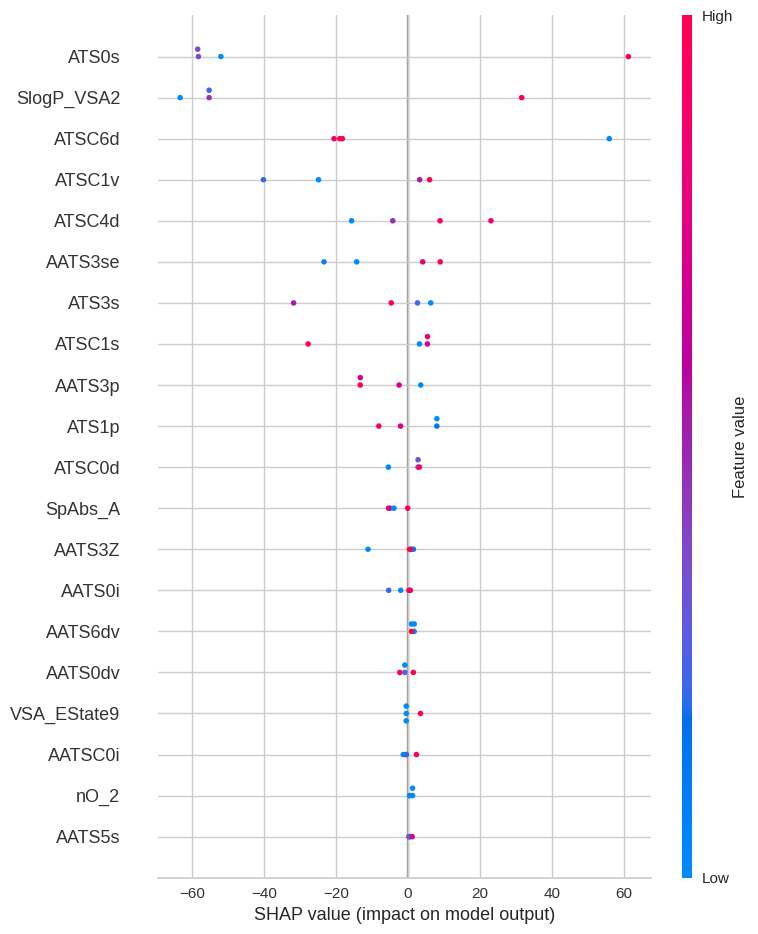

XGBoost 模型使用的参数：
objective: reg:squarederror
base_score: 0.5
booster: gbtree
callbacks: None
colsample_bylevel: 1
colsample_bynode: 1
colsample_bytree: 0.9196570692210617
early_stopping_rounds: None
enable_categorical: False
eval_metric: None
feature_types: None
gamma: 0
gpu_id: -1
grow_policy: depthwise
importance_type: None
interaction_constraints: 
learning_rate: 0.3881266059245635
max_bin: 256
max_cat_threshold: 64
max_cat_to_onehot: 4
max_delta_step: 0
max_depth: 7
max_leaves: 0
min_child_weight: 3
missing: nan
monotone_constraints: ()
n_estimators: 287
n_jobs: -1
num_parallel_tree: 1
predictor: auto
random_state: 2019
reg_alpha: 1.3239741968371682e-09
reg_lambda: 1.0977246194975894e-06
sampling_method: uniform
scale_pos_weight: 4.678746702506248
subsample: 0.8658626774950742
tree_method: auto
validate_parameters: 1
verbosity: 0


In [30]:
cm = setup(data = train, target = 'label', train_size = 0.8, test_data = test, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

xgb_0 = create_model('xgboost')
tunedxgb_0 = tune_model(xgb_0, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedxgb_0)
interpret_model(xgb_0)
best_params = tunedxgb_0.get_params()

# 输出参数
print("XGBoost 模型使用的参数：")
for param_name, param_value in best_params.items():
    print(f"{param_name}: {param_value}")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,126.5271,20699.2297,143.8723,-0.1289,0.6617,0.4844
1,161.5579,40408.3600,201.0183,-0.2122,0.9467,1.4687
2,99.7113,10130.0264,100.6480,0.6222,0.5657,0.6711
3,79.9631,8294.6067,91.0747,-0.3550,0.2417,0.1789
4,83.5821,12728.1026,112.8189,0.5335,0.4553,0.4362
Mean,110.2683,18452.0651,129.8864,0.0919,0.5742,0.6479
Std,30.4532,11767.0954,39.7690,0.4043,0.2329,0.4395


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,19.8008,771.3885,27.7739,0.9723,0.1779,0.1198


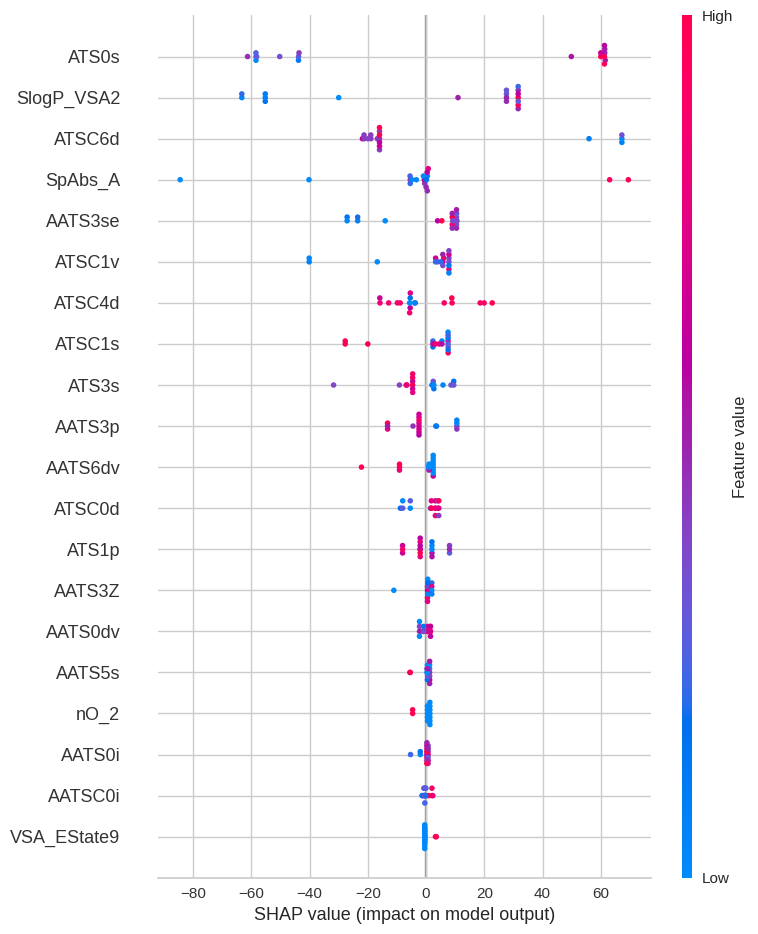

XGBoost 模型使用的参数：
objective: reg:squarederror
base_score: 0.5
booster: gbtree
callbacks: None
colsample_bylevel: 1
colsample_bynode: 1
colsample_bytree: 0.9196570692210617
early_stopping_rounds: None
enable_categorical: False
eval_metric: None
feature_types: None
gamma: 0
gpu_id: -1
grow_policy: depthwise
importance_type: None
interaction_constraints: 
learning_rate: 0.3881266059245635
max_bin: 256
max_cat_threshold: 64
max_cat_to_onehot: 4
max_delta_step: 0
max_depth: 7
max_leaves: 0
min_child_weight: 3
missing: nan
monotone_constraints: ()
n_estimators: 287
n_jobs: -1
num_parallel_tree: 1
predictor: auto
random_state: 2019
reg_alpha: 1.3239741968371682e-09
reg_lambda: 1.0977246194975894e-06
sampling_method: uniform
scale_pos_weight: 4.678746702506248
subsample: 0.8658626774950742
tree_method: auto
validate_parameters: 1
verbosity: 0


In [31]:
cm = setup(data = train, target = 'label', train_size = 0.8, test_data = train, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

xgb_6 = create_model('xgboost')
tunedxgb_6 = tune_model(xgb_6, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedxgb_6)
interpret_model(xgb_6)

# 输出参数
print("XGBoost 模型使用的参数：")
for param_name, param_value in best_params.items():
    print(f"{param_name}: {param_value}")

In [32]:
cm = setup(data = train_1, target = 'label', train_size = 0.8, test_data = test_1, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

xgb_1 = create_model('xgboost')
tunedxgb_1 = tune_model(xgb_1, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedxgb_1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,144.8710,22752.3032,150.8387,-8.7253,0.6200,0.4127
1,115.4240,17235.1505,131.2827,0.5644,0.6651,0.8256
2,128.2654,22916.8447,151.3831,-0.4952,0.8092,1.1928
3,123.4804,16391.6348,128.0298,0.4047,0.4605,0.4979
4,92.5941,9127.5178,95.5380,0.7666,0.5612,0.6313
Mean,120.9270,17684.6902,131.4145,-1.4969,0.6232,0.7121
Std,17.1273,5062.7151,20.3698,3.6398,0.1155,0.2778


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,96.3056,25401.4138,159.3782,0.0983,0.5156,0.3091


,SpAbs_A,ATS0dv,ATS5dv,ATS6dv,ATS7dv,ATS8dv,ATS0s,ATS3s,ATS4s,ATS5s,...,nHBDon_1,nHBDon_2,nHBDon_3,nHBDon_4,nRot_0,nRot_1,nRot_2,nRot_3,label,Label
0,-0.906361,-1.504322,-0.708551,-0.615291,-0.503627,-0.444841,-1.717065,-1.318632,-1.021318,-0.808961,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,520,204.959518
1,0.330047,0.331208,-0.185872,-0.615291,-0.503627,-0.444841,0.419490,0.547307,1.274308,0.538174,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,429,439.933594
2,-0.326568,-1.364056,-0.708551,-0.615291,-0.503627,-0.444841,-1.492749,-0.950063,-0.336738,-0.141420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,79,124.123016
3,0.222785,0.147899,-0.185872,-0.615291,-0.503627,-0.444841,0.191859,0.316389,0.378649,0.027876,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,418,403.874847


In [33]:
cm = setup(data = train_2, target = 'label', train_size = 0.8, test_data = test_2, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

xgb_2 = create_model('xgboost')
tunedxgb_2 = tune_model(xgb_2, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedxgb_2)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,74.5276,7853.1843,88.6182,-2.3568,0.2772,0.2016
1,164.1228,34093.5636,184.6444,-0.0605,0.8830,1.3217
2,178.9516,41688.3421,204.1772,-0.0991,0.9810,1.4558
3,153.6945,27342.3112,165.3551,0.0459,0.4923,0.4932
4,129.1335,19208.9529,138.5964,0.4291,0.7378,0.9588
Mean,140.0860,26037.2708,156.2783,-0.4083,0.6743,0.8862
Std,36.5824,11737.5461,40.1793,0.9920,0.2579,0.4780


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,116.5821,14779.1654,121.5696,0.5199,0.4421,0.4711


,SpAbs_A,ATS0dv,ATS5dv,ATS6dv,ATS7dv,ATS8dv,ATS0s,ATS3s,ATS4s,ATS5s,...,nHBDon_0,nHBDon_1,nHBDon_2,nHBDon_3,nRot_0,nRot_1,nRot_2,nRot_3,label,Label
0,0.055498,-0.303430,-0.473182,-0.534172,-0.420206,-0.351818,-0.718635,-0.758781,-0.658127,-0.607337,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,141,243.147659
1,1.766602,1.536188,1.558035,2.527458,1.631873,2.482727,0.272243,0.808259,0.921222,0.587228,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,554,396.525177
2,-0.966389,-0.684884,-0.682466,-0.534172,-0.420206,-0.351818,-0.419490,-0.250024,-1.158223,-0.899282,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,134,201.852722
3,-0.966389,-0.415623,-0.682466,-0.534172,-0.420206,-0.351818,-0.030147,-0.452428,-1.251787,-0.899282,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,376,237.146820


In [34]:
cm = setup(data = train_3, target = 'label', train_size = 0.8, test_data = test_3, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

xgb_3 = create_model('xgboost')
tunedxgb_3 = tune_model(xgb_3, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedxgb_3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,123.1534,19404.4318,139.2998,-3.2746,0.5116,0.2946
1,175.8632,39583.6799,198.9565,-0.7032,0.8884,1.0124
2,153.5261,36772.9653,191.7628,-0.2224,0.8879,1.3427
3,166.6324,40913.8554,202.2717,-4.1141,0.6159,0.3738
4,114.3769,18595.7824,136.3664,0.6010,0.7930,1.1100
Mean,146.7104,31054.1429,173.7314,-1.5427,0.7393,0.8267
Std,24.0567,9935.7775,29.5217,1.8251,0.1511,0.4170


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,148.0661,43365.8872,208.2448,-1.0679,0.8881,1.3211


,SpAbs_A,ATS0dv,ATS5dv,ATS6dv,ATS7dv,ATS0s,ATS3s,ATS4s,ATS5s,ATS6s,...,nHBDon_0,nHBDon_1,nHBDon_2,nHBDon_3,nRot_0,nRot_1,nRot_2,nRot_3,label,Label
0,0.306798,0.300301,-0.081459,-0.487599,-0.436018,0.370365,0.566142,0.440170,0.056675,-0.153077,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,418,354.811584
1,1.180333,1.505022,1.148302,1.479845,0.919012,1.837829,2.732208,1.452009,0.897239,2.013294,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,432,349.108124
2,0.418057,0.485642,0.102505,0.257762,-0.436018,0.606715,1.009405,0.708665,0.073479,0.949697,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,399,444.525726
3,-0.945018,-1.389981,-0.614689,-0.487599,-0.436018,-1.747481,-1.864643,-1.174317,-0.790648,-0.676730,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,83,483.658356


In [35]:
cm = setup(data = train_4, target = 'label', train_size = 0.8, test_data = test_4, silent=True,  
             session_id=2019, fold_strategy = 'kfold', fold = 5, fold_shuffle = True, normalize = True)

xgb_4 = create_model('xgboost')
tunedxgb_4 = tune_model(xgb_4, n_iter = 100, search_library = 'optuna', optimize = 'RMSE')
predict_model(tunedxgb_4)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,142.2320,30824.5581,175.5692,-1.6068,0.8816,1.3235
1,141.5600,28742.8557,169.5372,-0.1348,0.8539,1.2411
2,59.5191,4293.5646,65.5253,0.8293,0.1682,0.1624
3,137.3335,25356.3196,159.2367,-0.2761,0.7878,0.9310
4,194.2876,55163.5576,234.8692,-77.2585,0.7745,0.3705
Mean,134.9864,28876.1711,160.9475,-15.6894,0.6932,0.8057
Std,43.1582,16195.8919,54.5166,30.7943,0.2655,0.4640


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,78.8392,8362.2465,91.4453,0.5980,0.5100,0.5169


,SpAbs_A,ATS0dv,ATS5dv,ATS6dv,ATS7dv,ATS0s,ATS3s,ATS4s,ATS5s,ATS6s,...,nHBAcc_3,nHBDon_0,nHBDon_1,nHBDon_3,nRot_0,nRot_1,nRot_2,nRot_3,label,Label
0,-0.944598,-0.406631,-0.661853,-0.532004,-0.436018,0.075469,-0.359689,-1.180292,-0.854497,-0.760835,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,376,262.311401
1,1.129579,1.437350,1.120853,1.446583,0.919012,1.732247,2.467829,1.376056,0.865273,1.907266,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,432,500.767639
2,0.243479,0.267782,-0.122660,-0.532004,-0.436018,0.364150,0.520987,0.359407,0.008832,-0.241450,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,418,410.556671
3,-0.944598,-0.946432,-0.661853,-0.532004,-0.436018,-0.761705,-0.166134,-0.944684,-0.854497,-0.760835,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,79,204.457153
